`March, 21st 2022`

# **Simple Linear Regression**

<hr>

**- For simple linear regression, bulid a model using mpg dataset from seaborn:**

        - Horsepower as independent variable
        - mpg as dependent variable

**- Analyze the relationship**

**- Perform F-test and T-test**

**- Interpret the result**

**- Use α 5% for hypothesis testing**

**- Check RMSE value!**


<hr>


### **Import libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### **Load dataset**

`The data is about city-cycle car fuel consumption in miles per gallon.`

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [21]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

### **Data Exploration**

In [3]:
# Check dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# Handling missing value. At the moment, just simply drop the rows with missing values.
df = df.dropna()

In [5]:
# Reheck dataset info after dropping some rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [6]:
# Check descriptive stats of label and feature for simple linear regression.
df[['mpg', 'horsepower']].describe()

,mpg,horsepower
count,392.000000,392.000000
mean,23.445918,104.469388
std,7.805007,38.491160
min,9.000000,46.000000
25%,17.000000,75.000000
50%,22.750000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


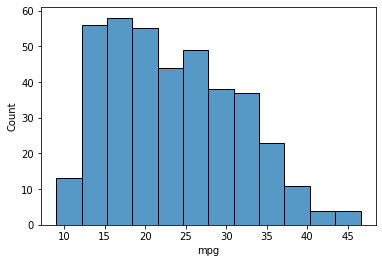

In [7]:
# Check data distribution of mpg.
sns.histplot(df['mpg']);

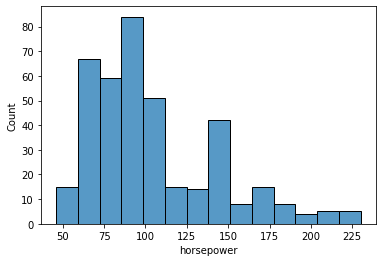

In [8]:
# Check data distribution of horsepower.
sns.histplot(df['horsepower']);

In [9]:
# Check correlation between mpg & horsepower.
# Use spearman method as the data of those variables are not following normal distribution.
df[['mpg', 'horsepower']].corr(method='spearman')

,mpg,horsepower
mpg,1.000000,-0.853616
horsepower,-0.853616,1.000000


**Interpretation**

What does -0.853 mean in terms of correlation?

- The value is negative, it means the relationship is inverse. The higher the horsepower, the smaller the mpg value.
- It is classified as strong correlation.

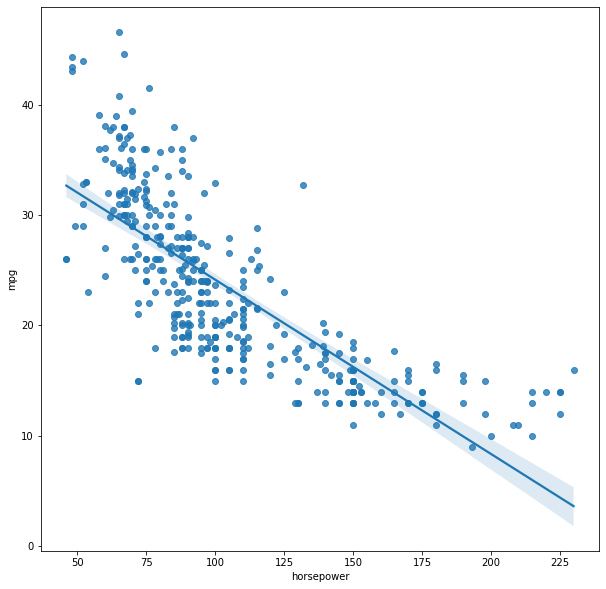

In [10]:
# Let's visualize the relationship between mpg & horsepower.
plt.figure(figsize=(10,10))
sns.regplot(x = 'horsepower', y = 'mpg', data = df);

### **Simple Linear Regression**

To build a simple linear model as instructed, it means:

- X: horsepower<br>
- y: mpg

In [11]:
# Define X and y.
X = df[['horsepower']]
y = df['mpg']

In [12]:
# Initialize model.
sm_lm = sm.OLS(y, sm.add_constant(X))
result = sm_lm.fit()

In [13]:
# Check the result summary.
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           7.03e-81
Time:                        14:50:41   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [14]:
# Check f-statistic result.
f_test_mpg = np.identity(len(result.params))
f_test_mpg = f_test_mpg[1:, :]
print(result.f_test(f_test_mpg))

<F test: F=array([[599.7177409]]), p=7.031989029404564e-81, df_denom=390, df_num=1>


For interpretation of F-statistic value, please refer to the [F-table](http://www.socr.ucla.edu/Applets.dir/F_Table.html).

#### **Interpretation**

* F-statistic value is used to define if there is a statistically significant influence between the dependent variable (mpg) and the independent variable (horsepower). Does horsepower influence mpg?

* According to the F-table, we got an F-critical value of 3.8145, much lower than the F-statistic score of 599.7. Since F-statistic > F-critical, we reject the null hypothesis, which means that the independent variables are jointly significant in explaining the variance of the dependent variable.

* The other way to interpret F-statistic is through the probability value (Prob (F-statistic)). We found that the p-value is less than 0.05, which is 7.03e-81. Therefore, we can say that we reject the null hypothesis that there is no significant influence between horsepower and mpg. In other words, based on the statistical test, there is enough evidence that states horsepower is influencing mpg value.

* The coeff constant is the y-intercept value (39.9359). In this case, we can ignore this value (no need to be interpreted) since there is no standard car with 0 horsepower.

* Coeff horsepower = -0.1578. This means for every increase of 1 horsepower; the mpg value will decrease by 0.1578.

* P>|t| = 0.000, is the partial test value (T-test). Since the value is smaller than the significance level (< 0.05), it can be said that the higher horsepower, the lower the mpg value.

* R-squared = 0.606 means the simple linear regression model that only uses 'horsepower' as a feature can explain about 60.6% variance of mpg value.

### **Check the prediction values of the model**

In [15]:
# Create a variable for the actual value (y_true).
y_true = y.reset_index().drop(columns='index')
y_true.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [16]:
# Create a variable for the predicted value (y_hat).
y_predict = result.predict()
y_hat = pd.DataFrame(data=y_predict, columns=['prediction'])
y_hat.head()

,prediction
0,19.416046
1,13.891480
2,16.259151
3,16.259151
4,17.837598


In [17]:
# Combine the y_true & y_pred values into one DataFrame.
y_merged = [y_true, y_hat]

pd.concat(y_merged, axis=1, join='inner')

,mpg,prediction
0,18.0,19.416046
1,15.0,13.891480
2,18.0,16.259151
3,16.0,16.259151
4,17.0,17.837598
...,...,...
387,27.0,26.361214
388,44.0,31.727935
389,32.0,26.676903
390,28.0,27.466127


### **Check RMSE value of the simple linear regression model**

In [18]:
# Calculate RMSE using built-in fuction of statsmodels.
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_true, y_hat)
rmse

array([4.89322623])

In [23]:
# MSE
mean_squared_error(y_true, y_hat)

23.943662938603108

In [19]:
# Calculate RMSE manually.
np.sqrt(mean_squared_error(y_true, y_hat))

4.893226230065713

**Interpretation**

To sum up, the simple linear model with 'horsepower' as its only feature can draw about 60% of the variance of mpg value. For the horsepower range of 46 to 230, we got around 4.90 of RMSE, which can be interpreted as the average prediction error for this range of horsepower is about +- 4.90 mpg.